In [1]:
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession

# create sparksession
spark = SparkSession \
    .builder \
    .appName('Pysparkexample') \
    .config('spark.some.config.option', 'some-value') \
    .getOrCreate()

# the .version attribute prints the Spark version - This is useful for checking for any updates that need
# to be written to the docker-compose.yml file and for any debugging revolving around version conflicts.
print('The Spark version is: {}'.format(spark.version))

In [3]:
df = spark.read.csv('BreadBasketBakery.csv', header='true', inferSchema = True)

In [4]:
# Read out columns names
columns = df.columns
print('Columns are: ')
for col in columns:
    print(col)

Columns are: 
Date
Time
Transaction
Item


In [5]:
# To get an idea of the size of the Dataset we are working with, counting the number of columns and rows is a good 
#place to start. Note, that this is better for much, much larger datasets than this one!
print('The total number of columns is:', df.count(), 
      '\nThe total number of rows is:', len(df.columns))

The total number of columns is: 21293 
The total number of rows is: 4


In [6]:
# Showing the first line of the DF
df.head()

Row(Date=datetime.datetime(2016, 10, 30, 0, 0), Time='09:58:11', Transaction=1, Item='Bread')

In [7]:
# Now print out the first 7 rows of the DF
df.show(7)

+-------------------+--------+-----------+-------------+
|               Date|    Time|Transaction|         Item|
+-------------------+--------+-----------+-------------+
|2016-10-30 00:00:00|09:58:11|          1|        Bread|
|2016-10-30 00:00:00|10:05:34|          2| Scandinavian|
|2016-10-30 00:00:00|10:05:34|          2| Scandinavian|
|2016-10-30 00:00:00|10:07:57|          3|Hot chocolate|
|2016-10-30 00:00:00|10:07:57|          3|          Jam|
|2016-10-30 00:00:00|10:07:57|          3|      Cookies|
|2016-10-30 00:00:00|10:08:41|          4|       Muffin|
+-------------------+--------+-----------+-------------+
only showing top 7 rows



In [9]:
# Creating a temp SQL table here
df.createOrReplaceTempView('BreadBasket')
spark.sql(
'''
SELECT `Date` as Date, 
Time, 
Transaction, 
Item 
FROM BreadBasket
LIMIT 100
'''
).show()

+-------------------+--------+-----------+-------------+
|               Date|    Time|Transaction|         Item|
+-------------------+--------+-----------+-------------+
|2016-10-30 00:00:00|09:58:11|          1|        Bread|
|2016-10-30 00:00:00|10:05:34|          2| Scandinavian|
|2016-10-30 00:00:00|10:05:34|          2| Scandinavian|
|2016-10-30 00:00:00|10:07:57|          3|Hot chocolate|
|2016-10-30 00:00:00|10:07:57|          3|          Jam|
|2016-10-30 00:00:00|10:07:57|          3|      Cookies|
|2016-10-30 00:00:00|10:08:41|          4|       Muffin|
|2016-10-30 00:00:00|10:13:03|          5|       Coffee|
|2016-10-30 00:00:00|10:13:03|          5|       Pastry|
|2016-10-30 00:00:00|10:13:03|          5|        Bread|
|2016-10-30 00:00:00|10:16:55|          6|    Medialuna|
|2016-10-30 00:00:00|10:16:55|          6|       Pastry|
|2016-10-30 00:00:00|10:16:55|          6|       Muffin|
|2016-10-30 00:00:00|10:19:12|          7|    Medialuna|
|2016-10-30 00:00:00|10:19:12| 

In [10]:
spark.sql(
'''
SELECT `Date` as Date, 
Time, 
Transaction, 
Item 
FROM BreadBasket 
WHERE Item = 'Coffee'
LIMIT 100

'''
).show()

+-------------------+--------+-----------+------+
|               Date|    Time|Transaction|  Item|
+-------------------+--------+-----------+------+
|2016-10-30 00:00:00|10:13:03|          5|Coffee|
|2016-10-30 00:00:00|10:19:12|          7|Coffee|
|2016-10-30 00:00:00|10:30:14|         12|Coffee|
|2016-10-30 00:00:00|10:31:24|         13|Coffee|
|2016-10-30 00:00:00|10:37:08|         16|Coffee|
|2016-10-30 00:00:00|10:49:29|         21|Coffee|
|2016-10-30 00:00:00|10:49:29|         21|Coffee|
|2016-10-30 00:00:00|11:03:24|         28|Coffee|
|2016-10-30 00:00:00|11:22:49|         33|Coffee|
|2016-10-30 00:00:00|11:25:45|         34|Coffee|
|2016-10-30 00:00:00|11:37:10|         37|Coffee|
|2016-10-30 00:00:00|11:55:51|         40|Coffee|
|2016-10-30 00:00:00|12:05:47|         44|Coffee|
|2016-10-30 00:00:00|12:08:36|         45|Coffee|
|2016-10-30 00:00:00|12:09:04|         46|Coffee|
|2016-10-30 00:00:00|12:17:02|         48|Coffee|
|2016-10-30 00:00:00|12:23:01|         49|Coffee|


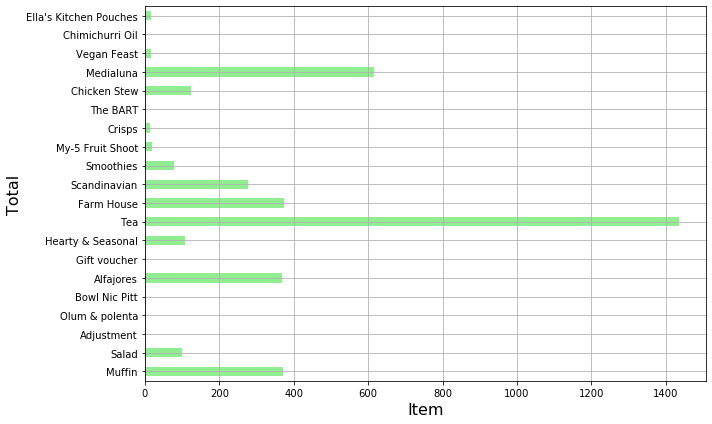

In [12]:
# PySpark will support most JS visualisation libraries, so we can use them for our plots.
# (Spark does not plot dataframes, so we need to pass post-computed DF's through to Pandas.)
plot_df = spark.sql(
'''
SELECT Item, 
COUNT(Transaction) as Total 
FROM BreadBasket 
GROUP BY Item
LIMIT 20
'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Item', y = 'Total', kind = 'barh', color = 'LightGreen', ax = ax, legend = False)
ax.set_xlabel('Item', size = 16)
ax.set_ylabel('Total', size = 16)
plt.grid()
plt.tight_layout()
plt.savefig('BreadBasket_barplot.png')
plt.show()

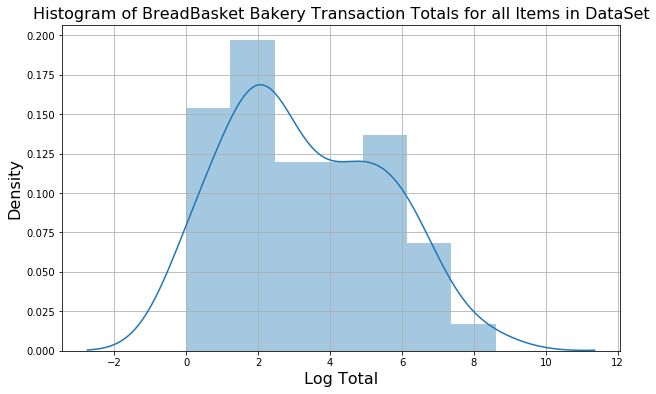

In [24]:
import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
'''
SELECT
Item, 
COUNT(Transaction) as Total 
FROM BreadBasket 
GROUP BY Item
'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of BreadBasket Bakery Transaction Totals for all Items in DataSet', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
plt.grid()
plt.savefig('bread_basket_distplot.png')
plt.show()

In [15]:
spark.sql(
'''
SELECT * FROM BreadBasket LIMIT 1  
'''
).show()

+-------------------+--------+-----------+-----+
|               Date|    Time|Transaction| Item|
+-------------------+--------+-----------+-----+
|2016-10-30 00:00:00|09:58:11|          1|Bread|
+-------------------+--------+-----------+-----+

